In [13]:
import pandas as pd

In [14]:
final_df=pd.read_csv('data/fligh_cleaned_data')

In [15]:
final_df.head(1)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dur_hour,dur_min
0,3,0,5,0,3897,24,3,22,20,1,10,2,50


In [16]:
from sklearn.feature_selection import mutual_info_classif
X=final_df.drop('Price',axis=1)
y=final_df['Price']

In [17]:
mutual_info_classif(X,y)

array([2.6076424 , 2.32175349, 2.28663588, 1.92200073, 0.883009  ,
       1.65132551, 1.50652517, 1.29681751, 1.91446617, 1.5982525 ,
       1.78010785, 1.13577782])

In [18]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Airline,2.654507
Source,2.265941
Destination,2.370438
Total_Stops,1.934841
journey_day,0.883259
journey_month,1.654865
Dep_Time_hour,1.518150
Dep_Time_minute,1.300748
Arrival_Time_hour,1.894696
Arrival_Time_minute,1.582576


In [19]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [21]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,y),
('cat_pipeline',cat_pipeline,X)
])

In [22]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [23]:
import seaborn as sns
import numpy as np

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print("Model is {}".format(ml_model))
    model=ml_model.fit(X_train,y_train)
    print("Training score is {}".format(model.score(X_train,y_train)))
    predictions=model.predict(X_test)
    print("predictions are: {}".format(predictions))
    r2score=r2_score(y_test,predictions)
    print("r2 score {}".format(r2score))
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    sns.distplot(y_test-predictions)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is RandomForestRegressor()
Training score is 0.9519312035628944
predictions are: [ 8693.66333333 17429.41       14043.2555     ...  3811.42
  5492.35       10533.59083333]
r2 score 0.8006769037727746
MAE:1132.8828304975837
MSE:3838101.2700843243
RMSE:1959.1072635474363


C:\Users\Admin\AppData\Local\Temp\ipykernel_6596\917425754.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


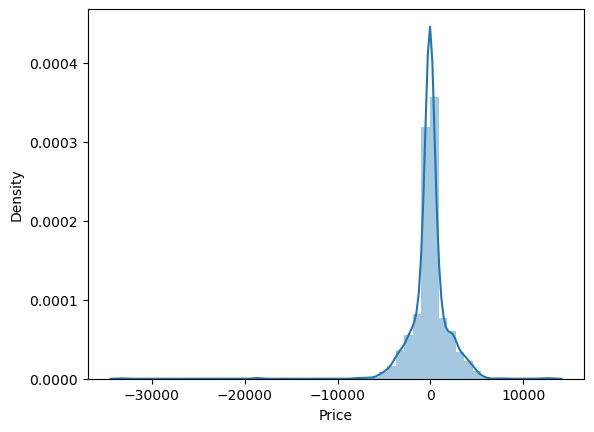

In [26]:
predict(RandomForestRegressor())

Model is LogisticRegression()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score is 0.26436512580456406
predictions are: [10844 15237 10844 ... 10844  7202 10262]
r2 score 0.29733906460667936
MAE:2220.4188114178755
MSE:13530212.401965372
RMSE:3678.3437036206083


C:\Users\Admin\AppData\Local\Temp\ipykernel_6596\917425754.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


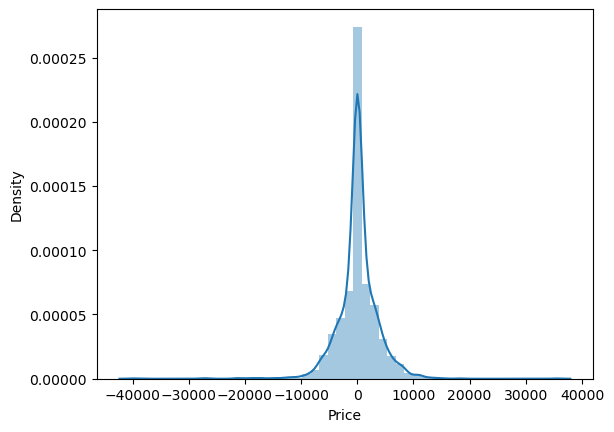

In [27]:
predict(LogisticRegression())

Model is KNeighborsRegressor()
Training score is 0.7452805216916671
predictions are: [ 7883.  14809.2 12933.2 ...  3197.4  8408.  11232.4]
r2 score 0.6714713607500369
MAE:1668.2731867103414
MSE:6326041.544763687
RMSE:2515.1623297043247


C:\Users\Admin\AppData\Local\Temp\ipykernel_6596\917425754.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


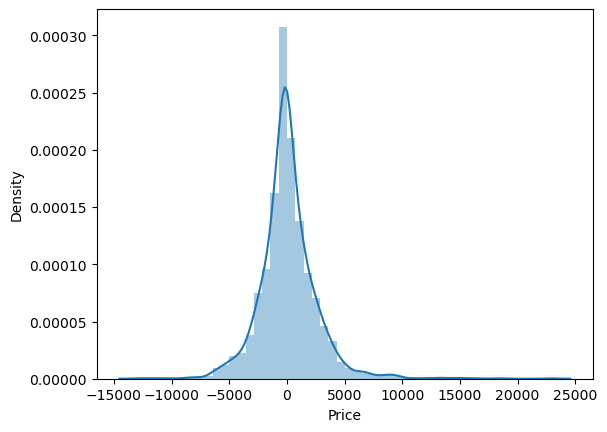

In [28]:
predict(KNeighborsRegressor())

Model is DecisionTreeRegressor()
Training score is 0.9700475836916205
predictions are: [ 8996. 18550. 14571. ...  3717.  5684. 10262.]
r2 score 0.6415071246029185
MAE:1309.3443846513806
MSE:6903023.214174726
RMSE:2627.360503276002


C:\Users\Admin\AppData\Local\Temp\ipykernel_6596\917425754.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


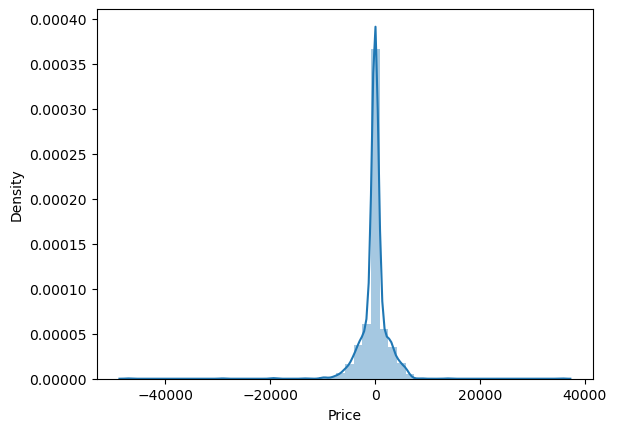

In [29]:
predict(DecisionTreeRegressor())

Model is GradientBoostingRegressor()
Training score is 0.7725311492145446
predictions are: [ 6010.86852057 16651.36521034 12037.2623272  ...  5665.24329726
  6517.73191766 11848.7369267 ]
r2 score 0.7890709258999282
MAE:1483.185705777331
MSE:4061582.2377066677
RMSE:2015.33675541004


C:\Users\Admin\AppData\Local\Temp\ipykernel_6596\917425754.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


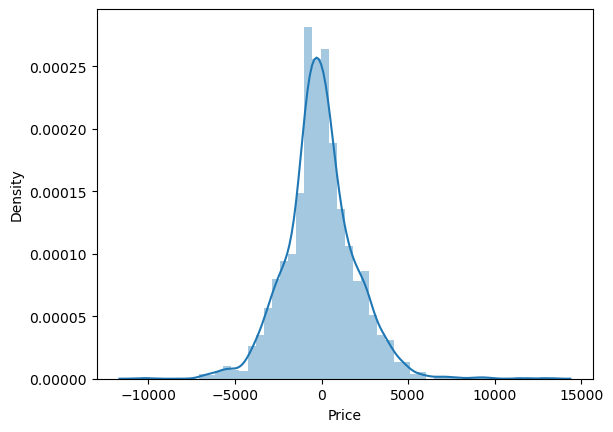

In [30]:
predict(GradientBoostingRegressor())

In [36]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
## Train multiple models


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
## Model Ecaluation
models={
    'LogisticRegression':LogisticRegression(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Model Training Performance
RMSE: 3678.3437036206083
MAE: 2220.4188114178755
R2 score 29.733906460667935


KNeighborsRegressor
Model Training Performance
RMSE: 2515.1623297043247
MAE: 1668.2731867103414
R2 score 67.14713607500369


DecisionTreeRegressor
Model Training Performance
RMSE: 2647.264142063043
MAE: 1308.1646934955545
R2 score 63.60550067336936


GradientBoostingRegressor
Model Training Performance
RMSE: 2015.3991540201193
MAE: 1483.5197027795828
R2 score 78.90578641773462


RandomForestRegressor
Model Training Performance
RMSE: 1952.6472653713347
MAE: 1134.973063556147
R2 score 80.1989240201906




In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
randomgrid= {
    'n_estimators':[100, 120, 150, 170, 200, 220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20]
}

In [42]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=randomgrid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages\sk

{'n_estimators': 120, 'max_features': 'sqrt', 'max_depth': 15}

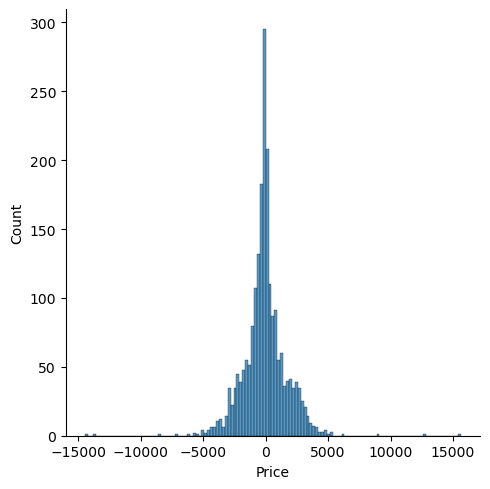

In [43]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [44]:
r2_score(y_test,prediction)

0.8473706219990451